# Ortak kütüphaneler

In [8]:
import numpy as np                 # Sayısal hesaplamalar için NumPy
import matplotlib.pyplot as plt    # Grafik çizimleri için Matplotlib
import math                        # Kombinasyon ve diğer matematiksel fonksiyonlar

## Notebook 3.1 -- Shallow neural networks I (1D giriş, 3 gizli birim, 1 çıkış)

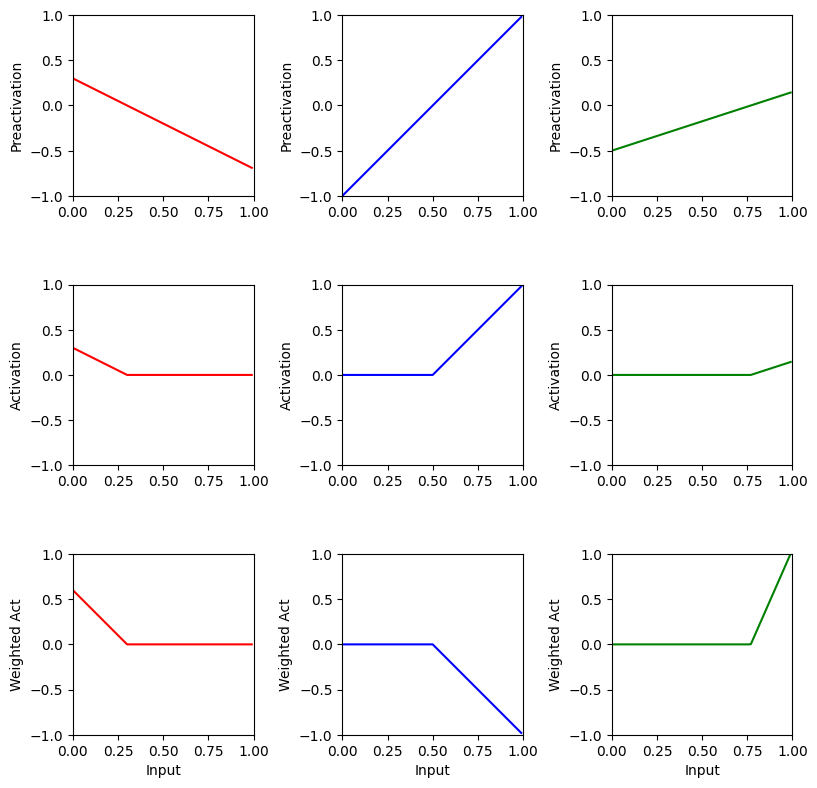

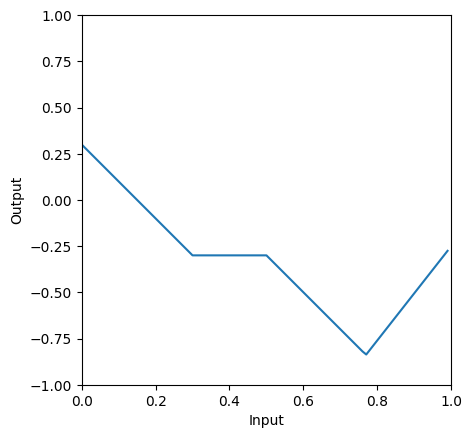

Your Loss = 9.385, True value = 9.385


In [9]:
# ReLU aktivasyon fonksiyonu
def ReLU(preactivation):
  # Her eleman için max(0, z) uygular; negatifleri 0'a kırpar
  activation = preactivation.clip(0.0)
  return activation

# Şekil 3.3'teki tek girişli, üç gizli birimli, tek çıkışlı ağ
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Preactivations: pre_i = theta_i0 + theta_i1 * x
  # Her gizli birim için doğrusal ön-aktivasyon (preactivation) hesaplanır
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Aktivasyonlar
  # Preactivation değerleri aktivasyon fonksiyonundan (ReLU gibi) geçirilir
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Ağırlıklı aktivasyonlar: w_act_i = phi_i * act_i
  # Çıkış katmanına giden ağırlıklarla gizli birim çıktıları ölçeklenir
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Çıkış: y = phi_0 + sum_i w_act_i
  # Bias (phi_0) eklenir ve ağırlıklı aktivasyonların toplamı alınır
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Ara aşamaları da döndürüyoruz; çizim ve analiz için gereklidir
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

# 1D ağın çizimi
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # plot_all True ise ara aşamaları 3x3 panelde göster
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    # Preactivation grafikleri
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    # Activation grafikleri
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    # Weighted activation grafikleri
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    # Eksen ayarları ve oranlar
    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]); ax[plot_y,plot_x].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input')
    plt.show()

  # Nihai ağ çıktısını tek grafikte göster
  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  # Eğitim/veri noktalarını da çiz
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i], 'mo')
  plt.show()

# Parametreler ve çalıştırma
theta_10 =  0.3 ; theta_11 = -1.0     # 1. gizli birimin bias ve ağırlığı
theta_20 = -1.0  ; theta_21 = 2.0     # 2. gizli birimin bias ve ağırlığı
theta_30 = -0.5  ; theta_31 = 0.65    # 3. gizli birimin bias ve ağırlığı
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0   # Çıkış katmanı bias ve ağırlıkları

x = np.arange(0,1,0.01)  # 0-1 arası giriş değerleri (adım 0.01)

# Ağı çalıştır ve ara çıktıları al
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# Grafikleri çiz
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss
def least_squares_loss(y_train, y_predict):
  # En küçük kareler kaybı: toplam (y_true - y_pred)^2
  loss = np.sum((y_train - y_predict)**2)
  return loss

# Eğitim verisi (girdi ve hedef çıktı çiftleri)
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# Ağı eğitim verisi üzerinde çalıştır
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# Kayıp değerini yazdır
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

## Notebook 3.2 -- Shallow neural networks II (2D giriş, 3 gizli birim, 1 veya 2 çıkış)

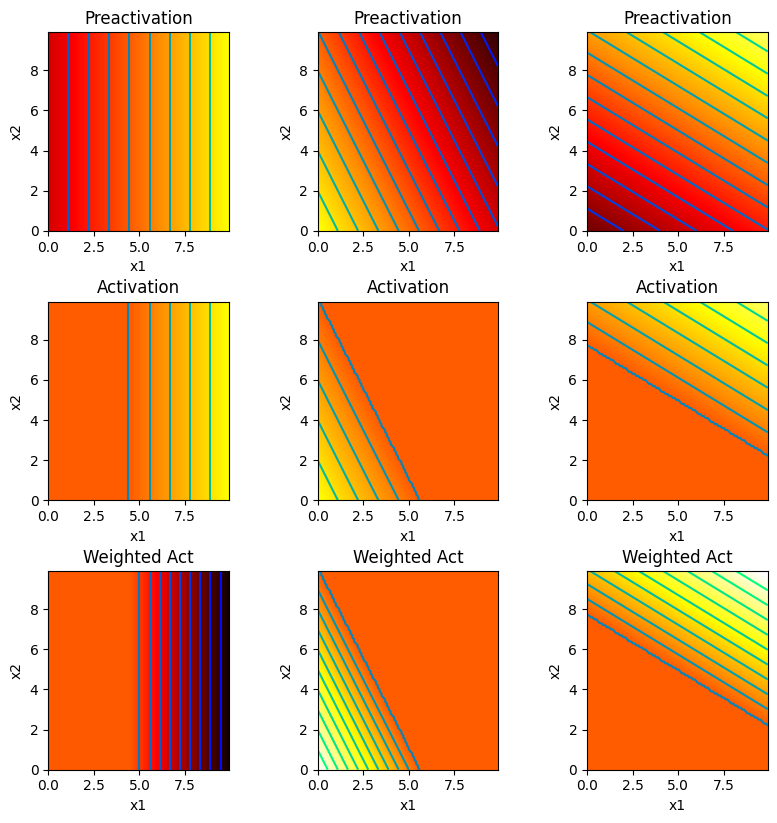

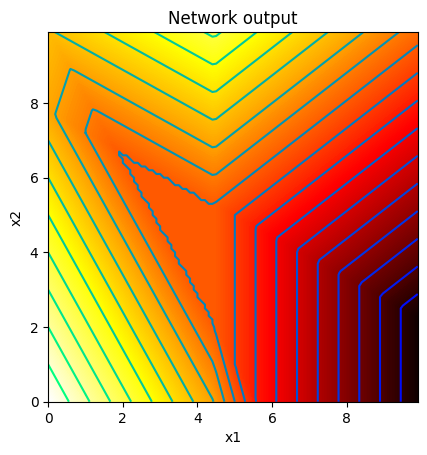

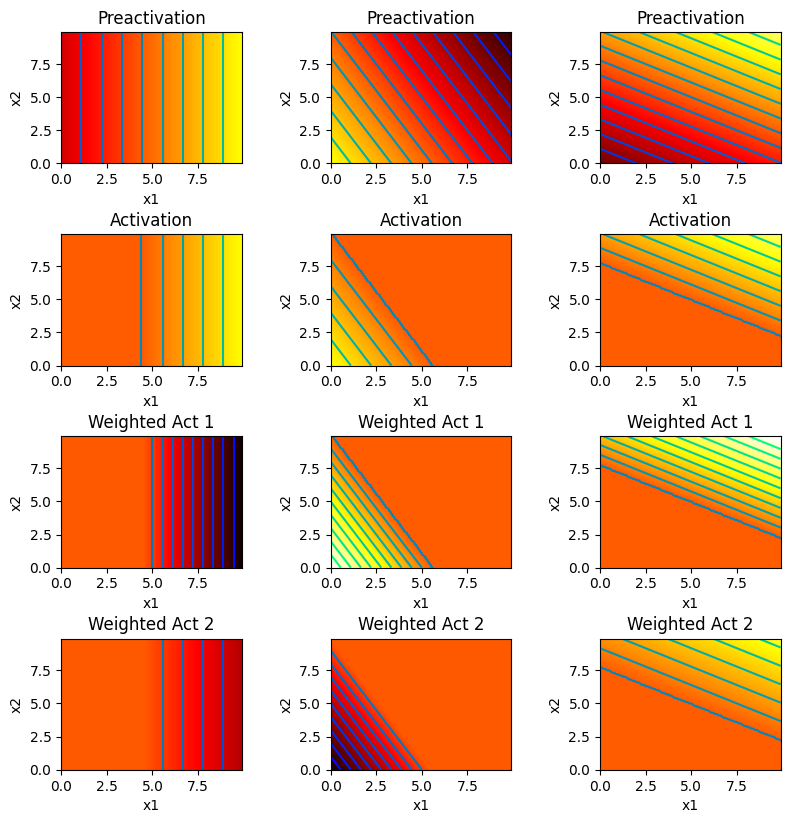

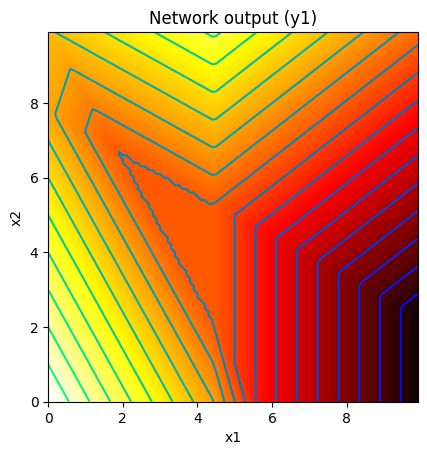

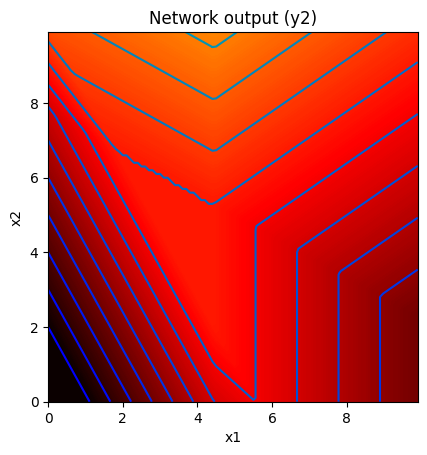

In [10]:
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    # 2B fonksiyonları ısı haritası ve kontur olarak çizer
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):
  # 3x3 panelde preactivation/activation/weighted activation görselleri
  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  # Nihai ağ çıktısı (y) 2B ısı haritası olarak
  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output')
  ax.set_aspect(1.0)
  plt.show()

# 2D girişli, 1 çıkışlı ağ
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # Preactivations: pre_i = theta_i0 + theta_i1*x1 + theta_i2*x2
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Aktivasyonlar
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Ağırlıklı aktivasyonlar
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Çıkış
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Ara aşamaları da döndür
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

# Parametreler ve çalışma
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0   # 1. gizli nöron parametreleri
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5 # 2. gizli nöron parametreleri
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9     # 3. gizli nöron parametreleri
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5  # Çıkış katmanı parametreleri

# 2B giriş ızgarası oluştur
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)

# Ağı çalıştır ve görselleştir
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

# İki çıkışlı sonuçları çizen yardımcı
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):
  # 4x3 panel: preactivation, activation, iki farklı çıkışın weighted activation’ları
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  # y1 çıktısı ısı haritası
  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output (y1)')
  ax.set_aspect(1.0)
  plt.show()

  # y2 çıktısı ısı haritası
  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output (y2)')
  ax.set_aspect(1.0)
  plt.show()

# 2D girişli, 2 çıkışlı ağ
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  # Ortak preaktivasyonlar (gizli katman)
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Aktivasyonlar
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Çıkış 1 için ağırlıklı aktivasyonlar ve çıktı
  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3
  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13

  # Çıkış 2 için ağırlıklı aktivasyonlar ve çıktı
  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Tüm ara hesapları döndür
  return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23

# Parametreler ve çalışma (3.2 iki çıkış)
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

# 2B giriş ızgarası
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)

# Ağı çalıştır ve iki çıktıyı görselleştir
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)

## Notebook 3.3 -- Shallow network regions

Di=2, D=3, Number of regions = 7, True value = 7
Di=10, D=50, Number of regions = 13432735556, True value = 13432735556
Di=10, D=8, Number of regions = 256, True value = 256
Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


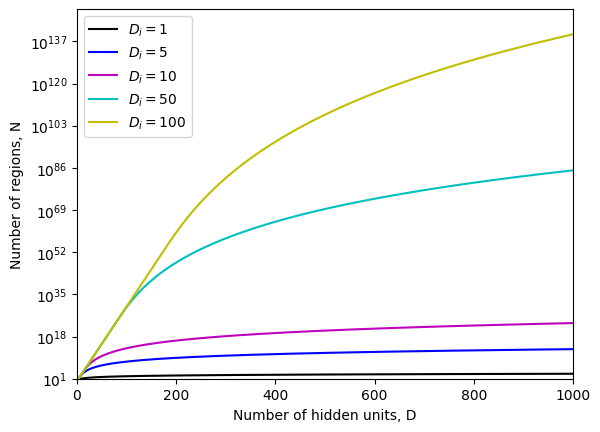

Di=10, D=8, Number of parameters = 97, True value = 97
Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


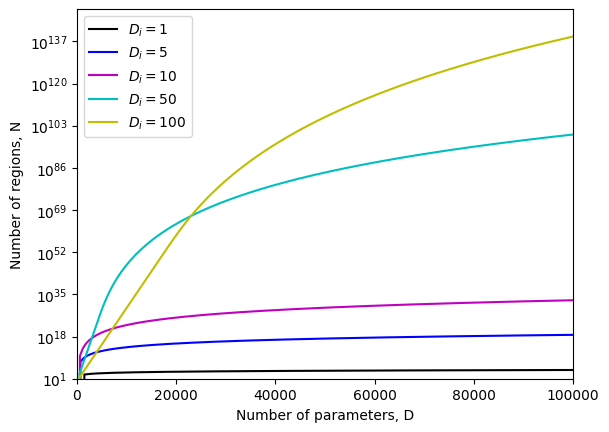

In [11]:
# Zaslavsky formülü
def number_regions(Di, D):
  # N = sum_{k=0..Di} C(D, k)
  # Di: giriş boyutu, D: gizli birim sayısı (hiper-düzlemlerin sayısı)
  N = 0
  for k in range(Di + 1):
    N += math.comb(D, k)
  return N

# Testler
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

# D < Di olduğunda örnek
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
  print("An exception occurred:", error)

# Şekil 3.9a grafiği: farklı giriş boyutları için bölgelerin D'ye göre değişimi
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        # D < Di ise formülde Di yerine min(Di, D) kullanılır
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)
# Log ölçeğinde bölgeleri çiz
fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['$D_i=1$', '$D_i=5$', '$D_i=10$', '$D_i=50$', '$D_i=100$'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

# Parametre sayısı fonksiyonu
def number_parameters(D_i, D):
  # Tek çıkış varsayımıyla toplam parametre:
  # Gizli katman: D adet nöron * (D_i giriş + 1 bias) = D*(D_i + 1)
  # Çıkış katmanı: (D gizli + 1 bias) = (D + 1)
  # Toplam: D*(D_i + 1) + (D + 1) = D_i*D + 2D + 1
  N = D_i * D + 2*D + 1
  return N

# Test
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

# Şekil 3.9b grafiği (~1 dk): parametre sayısına göre bölge sayısı
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Farklı D_i için D'yi ölçekleyerek al
        D = int(c_hidden * 500 / D_i)
        # Parametre sayısı
        params[c_dim, c_hidden] =  D_i * D + D + D + 1
        # Bölge sayısı (D < D_i olduğunda min kısıtı uygulanır)
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

# Log ölçeğinde parametre sayısına göre bölge sayısı grafiği
fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['$D_i=1$', '$D_i=5$', '$D_i=10$', '$D_i=50$', '$D_i=100$'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()